In [19]:
%pylab inline
import re
import math
import string
import pandas as pd
import numpy as np
from collections import Counter
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [20]:
data_file = pd.read_excel('data_f.xlsx')
print(data_file[0:3])

  Book No. Class No. barcode                             title  \
0     AA-N  621.3851       2  Network theory and filter design   
1     HO-F     005.1       3   Fundamentals of data structures   
2     HO-F     005.1       4   Fundamentals of data structures   

                                            Subjects             author  \
0  network analysis,engineering,applied physics,t...  Aatre, Vasudev K.   
1  data structures,engineering,applied physics,te...    Horowitz, Ellis   
2  data structures,special,methods information wo...    Horowitz, Ellis   

  copyrightdate      dateaccessioned isbn   pages      place  \
0          1989  2001-07-23 00:00:00  NaN  xv,476  New Delhi   
1          1983  2002-01-28 00:00:00  NaN     564  New Delhi   
2          1983  2002-01-28 00:00:00  NaN     564  New Delhi   

          publishercode  
0         Wiley Eastern  
1  Galgotia Book Source  
2  Galgotia Book Source  


In [22]:
book_names = [n for n in data_file['title'] if n!=0]
author= [n for n in data_file['author'] if n!=0]
print(book_names[0:20])
type(book_names)

[u'Network theory and filter design', u'Fundamentals of data structures', u'Fundamentals of data structures', u'Electronic measurements', u'Digital computer electronics:an introduction to microcomputers', u'Electrical engineering materials', u'Electronic devices and circuits', u'Analysis and design of analog integrated circuits', u'Lotus 1-2-3 : quick reference handbook', u'Lotus 1-2-3 student workbook and instruction guide', u'Optical fiber transmission systems', u'Solid state electronic devices', u'Interactive computer graphics:data structures, algorithms, languages', u'Electrical machines and their applications', u'Computer Architecture and Organization', u'Fundamentals of programming languages', u'Introduction to digital computer design', u'Introduction to operating systems', u'Computer programming in COBOL', u'Programming in Pascal']


list

In [23]:
from nltk.tokenize import RegexpTokenizer
import nltk

In [24]:
tokenizer = RegexpTokenizer(r'\w+')

In [25]:
from django.utils.encoding import smart_str, smart_unicode

tokens = [tokenizer.tokenize(smart_str(i)) for i in book_names]
#tokens = [nltk.word_tokenize(i) for i in book_names]
print(tokens[0:20])
type(tokens)
#sorted(set(tokens[0:5]))

[['Network', 'theory', 'and', 'filter', 'design'], ['Fundamentals', 'of', 'data', 'structures'], ['Fundamentals', 'of', 'data', 'structures'], ['Electronic', 'measurements'], ['Digital', 'computer', 'electronics', 'an', 'introduction', 'to', 'microcomputers'], ['Electrical', 'engineering', 'materials'], ['Electronic', 'devices', 'and', 'circuits'], ['Analysis', 'and', 'design', 'of', 'analog', 'integrated', 'circuits'], ['Lotus', '1', '2', '3', 'quick', 'reference', 'handbook'], ['Lotus', '1', '2', '3', 'student', 'workbook', 'and', 'instruction', 'guide'], ['Optical', 'fiber', 'transmission', 'systems'], ['Solid', 'state', 'electronic', 'devices'], ['Interactive', 'computer', 'graphics', 'data', 'structures', 'algorithms', 'languages'], ['Electrical', 'machines', 'and', 'their', 'applications'], ['Computer', 'Architecture', 'and', 'Organization'], ['Fundamentals', 'of', 'programming', 'languages'], ['Introduction', 'to', 'digital', 'computer', 'design'], ['Introduction', 'to', 'operat

list

In [26]:
import xlrd
workbook = xlrd.open_workbook('data_f.xlsx', on_demand = True)
sheet=workbook.sheet_by_name('Sheet1')

In [27]:
 count =[len(i) for i in tokens]
 print (count[0])

5


In [28]:
#full train set to be obtained
'''from django.utils.encoding import smart_str, smart_unicode

dict=open('dictionary.txt','w')
for i in range(sheet.nrows):
#for i in range(0,10000):
    count =[int(len(j)) for j in tokens]
    #count[i]=map(int,count[i])
    if (count[i]!=0):
        n=count[i]
    for j in range (n):
        dict.write(u''.join(smart_str(tokens[i][j])).strip())
        dict.write('\n')
dict.close()
'''

"from django.utils.encoding import smart_str, smart_unicode\n\ndict=open('dictionary.txt','w')\nfor i in range(sheet.nrows):\n#for i in range(0,10000):\n    count =[int(len(j)) for j in tokens]\n    #count[i]=map(int,count[i])\n    if (count[i]!=0):\n        n=count[i]\n    for j in range (n):\n        dict.write(u''.join(smart_str(tokens[i][j])).strip())\n        dict.write('\n')\ndict.close()\n"

In [95]:
dict=open('dicttotal.txt').read()
len (dict)

1332854

In [96]:
def onlytext(text):
    return re.findall('[a-z]+', text.lower())

In [97]:
from sys import argv
#search_query=input("Please enter the book name")
#onlytext(search_query)

In [98]:
words=onlytext(dict)

In [99]:
count =[len(item) for item in tokens]
n=sum(count)/len(count)
print (n)
def sample(bag, n):
    return ' '.join(random.choice(bag) for _ in range(n))

6.30670132452


In [100]:
sample(words,int(n))

'theory engineeing weights is cdma mathematics'

In [101]:
Counter(dict)
COUNTS=Counter(words)
print (COUNTS.most_common(10))

[('is', 3691), ('engineering', 2007), ('specification', 1987), ('design', 1521), ('part', 1201), ('systems', 1142), ('analysis', 1089), ('introduction', 977), ('theory', 954), ('management', 930)]


In [102]:
for w in onlytext('Science life'):
    print(COUNTS[w],w)
#Occurence of science and life in the dictionary

(577, 'science')
(179, 'life')


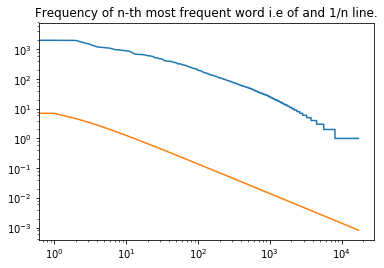

In [103]:
#[('of', 3364), ('and', 3035), ('in', 1207), ('engineering', 1102), ('design', 701), ('the', 670), ('to', 596), ('theory', 590), ('for', 526), ('on', 471)]
M = COUNTS['of']
yscale('log'); xscale('log'); title('Frequency of n-th most frequent word i.e of and 1/n line.')
plot([c for (w, c) in COUNTS.most_common()])
plot([M/i for i in range(1, len(COUNTS)+1)]);

In [104]:
def correct(word):
    # Preference order edit distance 0->1->2 else def.
    candidates = (known(edits0(word)) or 
                  known(edits1(word)) or 
                  known(edits2(word)) or 
                  [word])
    return max(candidates, key=COUNTS.get)

In [105]:
def known(words):
    return {w for w in words if w in COUNTS}
def edits0(word):
    return {word}
def edits2(word):
    return { ed2 for ed1 in edits1(word)for ed2 in edits1(ed1)
    }

In [106]:
#one edit away from correct
def edits1(word):
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

def splits(word):
    #Return a list of all possible (first, rest) pairs that comprise word
    return [(word[:i], word[i:]) 
            for i in range(len(word)+1)]

alphabet = 'abcdefghijklmnopqrstuvwxyz'

In [107]:
#all possible combinations
splits('life')

[('', 'life'), ('l', 'ife'), ('li', 'fe'), ('lif', 'e'), ('life', '')]

In [108]:
print (edits0('lif'))

set(['lif'])


In [109]:
print (edits1('life'))

set(['ltfe', 'fife', 'ylife', 'aife', 'ljife', 'lpfe', 'lgife', 'liae', 'lize', 'ljfe', 'lije', 'lvife', 'lipfe', 'lifze', 'qlife', 'lvfe', 'lxife', 'lijfe', 'dlife', 'zife', 'lifne', 'xlife', 'lqfe', 'lire', 'ulife', 'nlife', 'lhfe', 'leife', 'libe', 'lifke', 'lifre', 'flife', 'hife', 'mife', 'lifbe', 'klife', 'like', 'hlife', 'ife', 'lizfe', 'lzfe', 'gife', 'rlife', 'lsife', 'lise', 'lfe', 'lige', 'lipe', 'lifqe', 'lirfe', 'lyfe', 'liqe', 'lifej', 'lioe', 'liffe', 'lixe', 'litfe', 'lihfe', 'lsfe', 'lihe', 'lifxe', 'lifwe', 'lifei', 'vife', 'loife', 'llife', 'livfe', 'lifhe', 'sife', 'lcife', 'lpife', 'xife', 'jlife', 'lilfe', 'lifpe', 'liye', 'alife', 'libfe', 'wlife', 'lhife', 'liie', 'lifye', 'lixfe', 'luife', 'qife', 'mlife', 'lifie', 'yife', 'lwife', 'lief', 'ilife', 'liee', 'ilfe', 'liqfe', 'tife', 'lfie', 'lifez', 'lifoe', 'dife', 'lifex', 'lwfe', 'lime', 'lkfe', 'lifev', 'lifeu', 'lifet', 'lifes', 'lifer', 'lifeq', 'lifep', 'limfe', 'blife', 'lifme', 'lqife', 'lifee', 'lifey',

In [110]:
print (len(edits2('scienc')))
onlytext('lif sciece')

52170


['lif', 'sciece']

In [111]:
list(map(correct, onlytext('lif sciece engineerig fuck')))

['life', 'science', 'engineering', 'luck']

In [112]:
def correct_text(text):
    return re.sub('[a-zA-Z]+', correct_match, text)
#preserve case and correct
def correct_match(match):
    word = match.group()
    return case_of(word)(correct(word.lower()))
#case-function appropriate
def case_of(text):
    return (str.upper if text.isupper() else
            str.lower if text.islower() else
            str.title if text.istitle() else
            str)    

In [113]:
#edit list map type
list(map(case_of, ['computational', 'Computer', 'graphics', 'PROBLEMS']))


[<method 'lower' of 'str' objects>,
 <method 'title' of 'str' objects>,
 <method 'lower' of 'str' objects>,
 <method 'upper' of 'str' objects>]

In [114]:
correct_text('Schaums ouline of theor AND probles OF electriC Crcuts')

'Schaum outline of theory AND problems OF electric Circuts'

In [115]:
#now apply the bigrams and trigrams model

In [116]:
whole_words = [' '.join(tokens[i]) for i in range(len(tokens))]
print(whole_words[0:3])

['Network theory and filter design', 'Fundamentals of data structures', 'Fundamentals of data structures']


In [117]:
whole_set_of_words = ' '.join(whole_words)
print(whole_set_of_words)

Network theory and filter design Fundamentals of data structures Fundamentals of data structures Electronic measurements Digital computer electronics an introduction to microcomputers Electrical engineering materials Electronic devices and circuits Analysis and design of analog integrated circuits Lotus 1 2 3 quick reference handbook Lotus 1 2 3 student workbook and instruction guide Optical fiber transmission systems Solid state electronic devices Interactive computer graphics data structures algorithms languages Electrical machines and their applications Computer Architecture and Organization Fundamentals of programming languages Introduction to digital computer design Introduction to operating systems Computer programming in COBOL Programming in Pascal Data management and file structures Networks and Systems Networks and Systems Networks and Systems Pascal programming problems and applications Data structures and algorithms Basic Electronics and Linear Circuits Electronics communica

In [118]:
#Make a probability distribution,using Counter
def pdist(counter):
    N = sum(counter.values())
    return lambda x: counter[x]/N

P = pdist(COUNTS)

In [119]:
print(COUNTS)

Counter({'is': 3691, 'engineering': 2007, 'specification': 1987, 'design': 1521, 'part': 1201, 'systems': 1142, 'analysis': 1089, 'introduction': 977, 'theory': 954, 'management': 930, 's': 879, 'applications': 872, 'handbook': 795, 'practice': 702, 'proceedings': 685, 'india': 672, 'methods': 666, 'principles': 663, 'technology': 648, 'power': 639, 'computer': 609, 'control': 603, 'guide': 597, 'science': 577, 'held': 573, 'materials': 520, 'electrical': 518, 'system': 517, 'programming': 506, 'mechanics': 483, 'chemistry': 482, 'concrete': 481, 'fundamentals': 464, 'structures': 441, 'development': 418, 'modern': 410, 'international': 410, 'conference': 399, 'c': 399, 'approach': 397, 'data': 394, 'physics': 394, 'book': 393, 'problems': 387, 'code': 380, 'steel': 366, 'digital': 366, 'electronics': 363, 'indian': 357, 'chemical': 354, 'industrial': 354, 'energy': 347, 'processing': 328, 'education': 325, 'water': 325, 'world': 323, 'engineers': 322, 'construction': 321, 'structural'

In [120]:
s='life after death'
for w in onlytext(s):
    print (P(w),w)

(0.0011778175501394956, 'life')
(3.289993156814234e-05, 'after')
(8.5539822077170086e-05, 'death')


In [427]:
#probability assuming no dependancies
def Pwords(words):
    return product(P(w) for w in words)
#"Multiply the numbers together.  (Like `sum`, but with multiplication.)"
def product(nums):
    result = 1
    for x in nums:
        result *= x
    return result

In [410]:
tests = ['life after death', 
         'life after death is',
         'life after death is neverseen']

for test in tests:
    print (Pwords(onlytext(test)), test)

(3.314678096485656e-12, 'life after death')
(8.0502690254570178e-14, 'life after death is')
(0.0, 'life after death is neverseen')


In [411]:
#word segmentation

In [124]:
#Memoize function f, whose args must all be hashable.
def memo(f):
    cache = {}
    def fmemo(*args):
        if args not in cache:
            cache[args] = f(*args)
        return cache[args]
    fmemo.cache = cache
    return fmemo


In [125]:
max(len(w) for w in COUNTS)

30

In [126]:
def splits(text, start=0, L=14):
    return [(text[:i], text[i:]) 
            for i in range(start, min(len(text), L)+1)]

In [127]:
print (splits('begins'))
print (splits('lifeafter', 1, 4))

[('', 'begins'), ('b', 'egins'), ('be', 'gins'), ('beg', 'ins'), ('begi', 'ns'), ('begin', 's'), ('begins', '')]
[('l', 'ifeafter'), ('li', 'feafter'), ('lif', 'eafter'), ('life', 'after')]


In [128]:
@memo
#most probable segmentation of text
def segment(text):
    if not text: 
        return []
    else:
        candidates = ([first] + segment(rest) 
                      for (first, rest) in splits(text, 1))
        return max(candidates, key=Pwords)

In [129]:
segment('artand')

['art', 'and']

In [226]:
segment('computerarchitectureorganization')

['computer', 'architecture', 'organization']

In [268]:
Pwords(segment('assdasfakdlafguiewudaskjcxjvfehawsdlsdkdasvsd;lfdfjlklnvjfdks;lvxc'))

0.0

In [432]:
# 6 more data ||Returin a Counter initialized from key-value pairs,
def load_counts(filename, sep='\t'):
    C = Counter()
    for line in open(filename):  
            key, count = line.split(sep)
            C[key] = int(count)  
    return C

In [433]:
COUNTS1 = load_counts('count_1f.txt')
COUNTS2 = load_counts('count_2f.txt')

P1w = pdist(COUNTS1)
P2w = pdist(COUNTS2)


In [434]:
print len(COUNTS1), sum(COUNTS1.values())/1e9
print len(COUNTS2), sum(COUNTS2.values())/1e9

21901 0.000151976
109586 0.00025957


In [423]:
COUNTS1.most_common(12)

[('IS', 3684),
 ('Specification', 1970),
 ('engineering', 1499),
 ('design', 1143),
 ('Part', 1085),
 ('systems', 925),
 ('s', 831),
 ('analysis', 818),
 ('Introduction', 726),
 ('management', 706),
 ('theory', 701),
 ('applications', 688)]

In [424]:
#7 bigram  
#The probability of a sequence of words, using bigram data, given prev word.
def Pwords2(words, prev='<S>'):
    return product(cPword(w, (prev if (i == 0) else words[i-1]) )
                   for (i, w) in enumerate(words))
# Change Pwords to use P1w (the bigger dictionary) instead of Pword
def Pwords(words):
    return product(P1w(w) for w in words)
#Conditional probability of word, given previous word
def cPword(word, prev):    
    bigram = prev + ' ' + word
    if P2w(bigram) > 0 and P1w(prev) > 0:
        return P2w(bigram) / P1w(prev)
    else: # Average the back-off value and zero.
        return P1w(word) / 2

In [429]:
print (Pwords2(onlytext('life after')))
print (Pwords2(onlytext('after computer')))
print (Pwords(onlytext('pain after life')))

0.0
0.0
0.0


In [426]:
@memo 
def segment2(text, prev='<S>'): 
    "Return best segmentation of text; use bigram data." 
    if not text: 
        return []
    else:
        candidates = ([first] + segment2(rest, first) 
                      for (first, rest) in splits(text, 1))
        return max(candidates, key=lambda words: Pwords2(words, prev))

In [403]:
print segment2('lifeafterdeath')
print segment2('computerarchitecture')
print segment2('readingsinmanagement')
print segment2('changingworldofexecutive')

['life', 'a', 'f', 'te', 'r', 'death']
['computer', 'architecture']
['readings', 'in', 'management']
['changing', 'world', 'of', 'executive']


In [404]:
#data has to be cleaned before dictionary process like :, has to be removed
bookname = ('Informationintegrityastructureforitsdefinitionandmanagement')
print segment(bookname)
print segment2(bookname)

['Information', 'integrity', 'a', 'structure', 'f', 'or', 'its', 'definition', 'and', 'management']
['Information', 'integrity', 'a', 'structure', 'for', 'its', 'definition', 'and', 'management']


In [405]:
P1w('of')

1.9739958940885403e-05

In [406]:
book = 'Opticalmicroscopyofmetals'
print segment(book)
print segment2(book)

['Optical', 'microscopy', 'of', 'metals']
['Optical', 'microscopy', 'of', 'metals']


In [407]:
#8